In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
# Set the random seed for reproducibility
np.random.seed(42)

# Number of rows
n_rows = 1000

# Generate column values
col1 = np.random.normal(loc=1, scale=4, size=n_rows)  # Mean=1, Std Dev=4
col2 = np.random.normal(loc=5, scale=2, size=n_rows)  # Mean=5, Std Dev=2
col3 = np.random.uniform(low=0, high=10, size=n_rows)  # Uniform distribution
col4 = np.random.lognormal(mean=1, sigma=0.5, size=n_rows) # Log-normal distribution - skewed
col5 = 1 # Constant
col_bool = (col1 > col2).astype(int)  # Boolean mapping to 1 where col1 > col2
noise = np.random.normal(loc=0, scale=5, size=n_rows)  # Noise with mean=0, std dev=5

# Create the DataFrame
df = pd.DataFrame({
    'Column1': col1,
    'Column2': col2,
    'Column3': col3,
    'Column4': col4,
    'Column5': col5,
    'col_bool': col_bool
})

df['col_num'] = (2*df['Column1'] + 3*df['Column2']) + noise


In [3]:
print(df.head())

    Column1   Column2   Column3   Column4  Column5  col_bool    col_num
0  2.986857  7.798711  4.071065  3.620325        1         0  28.548170
1  0.446943  6.849267  0.660098  1.113009        1         0  22.502154
2  3.590754  5.119261  3.488205  2.270920        1         0  17.572497
3  7.092119  3.706126  1.109981  3.159942        1         1  20.223224
4  0.063387  6.396447  8.082352  2.979982        1         0  12.373400


In [4]:
df.describe(include='all')
#insights - mean and median - central measure, standard dev - spread, normal dist. , mean != median -> outlier -> skewed, 1 ->

,Column1,Column2,Column3,Column4,Column5,col_bool,col_num
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.00000,1000.000000
mean,1.077328,5.141672,4.968485,3.099860,1.0,0.18300,17.253051
std,3.916864,1.994909,2.903181,1.734161,0.0,0.38686,10.807721
min,-11.965069,-0.880777,0.000116,0.609225,1.0,0.00000,-15.051726
25%,-1.590361,3.787517,2.475049,1.898239,1.0,0.00000,10.786029
50%,1.101202,5.126154,5.005024,2.716436,1.0,0.00000,17.209780
75%,3.591776,6.457764,7.482269,3.830321,1.0,0.00000,24.038837
max,16.410926,11.386215,9.988926,19.358253,1.0,1.00000,61.282149


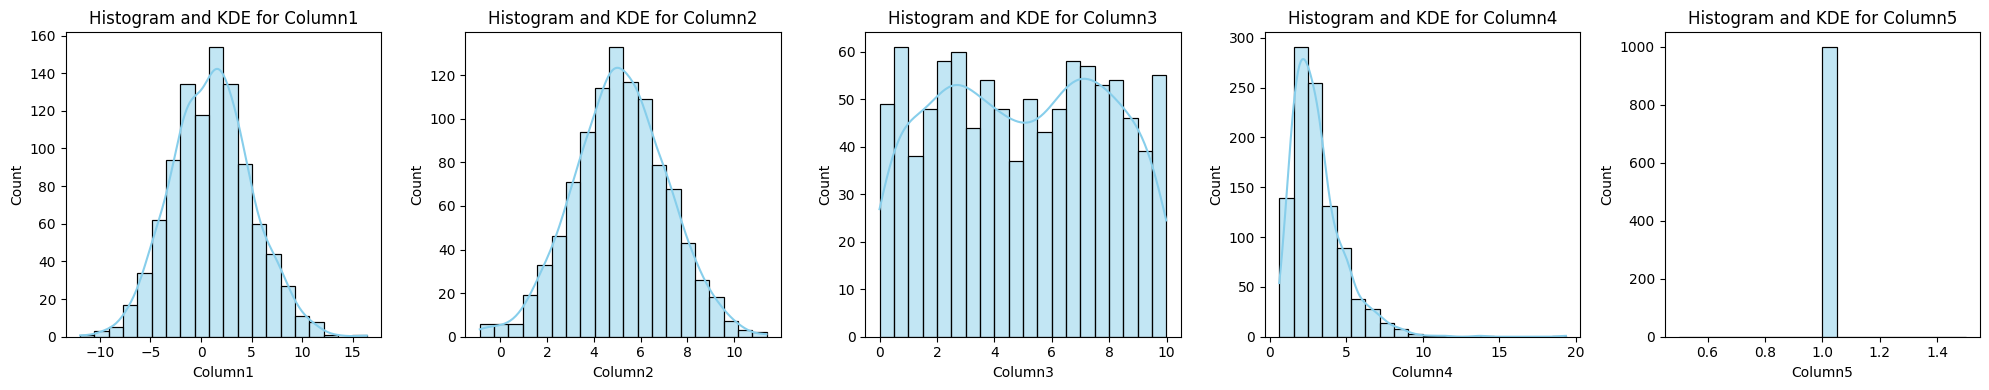

In [5]:
# Univariate analysis
numeric_cols = ['Column1','Column2','Column3','Column4','Column5']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

for i,col in enumerate(numeric_cols):
  sns.histplot(df[col], kde=True, ax=axes[i], bins=20, color='skyblue')
  axes[i].set_title(f'Histogram and KDE for {col}')

# Adjust layout
plt.tight_layout()
plt.show()

# Mean vs Median -> Col3 -> uniform -> right skewed, mean > median. ,mean = avg, median - middle pt.


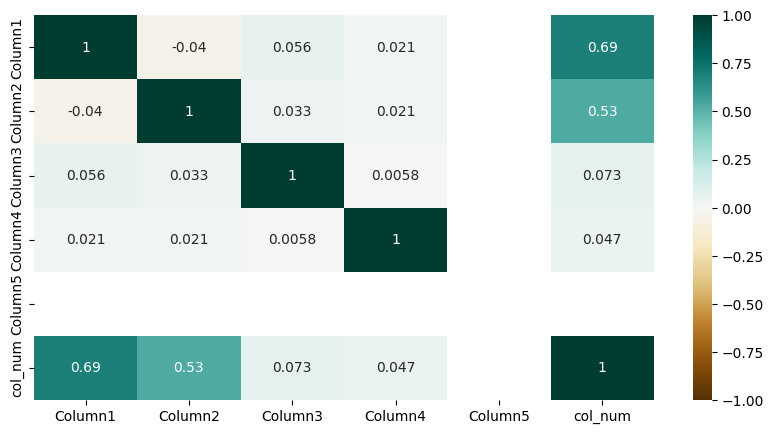

In [6]:
#Bivariate analysis
plt.figure(figsize=(10,5))
sns.heatmap(df[['Column1','Column2','Column3','Column4','Column5','col_num']].corr(),annot=True,cmap='BrBG',vmin=-1,vmax=1)
plt.show()
# insights - which cols useful ?
# What relationship measure ? - correlation, Col1, Col 2 [-1, +1]

<Figure size 400x400 with 0 Axes>

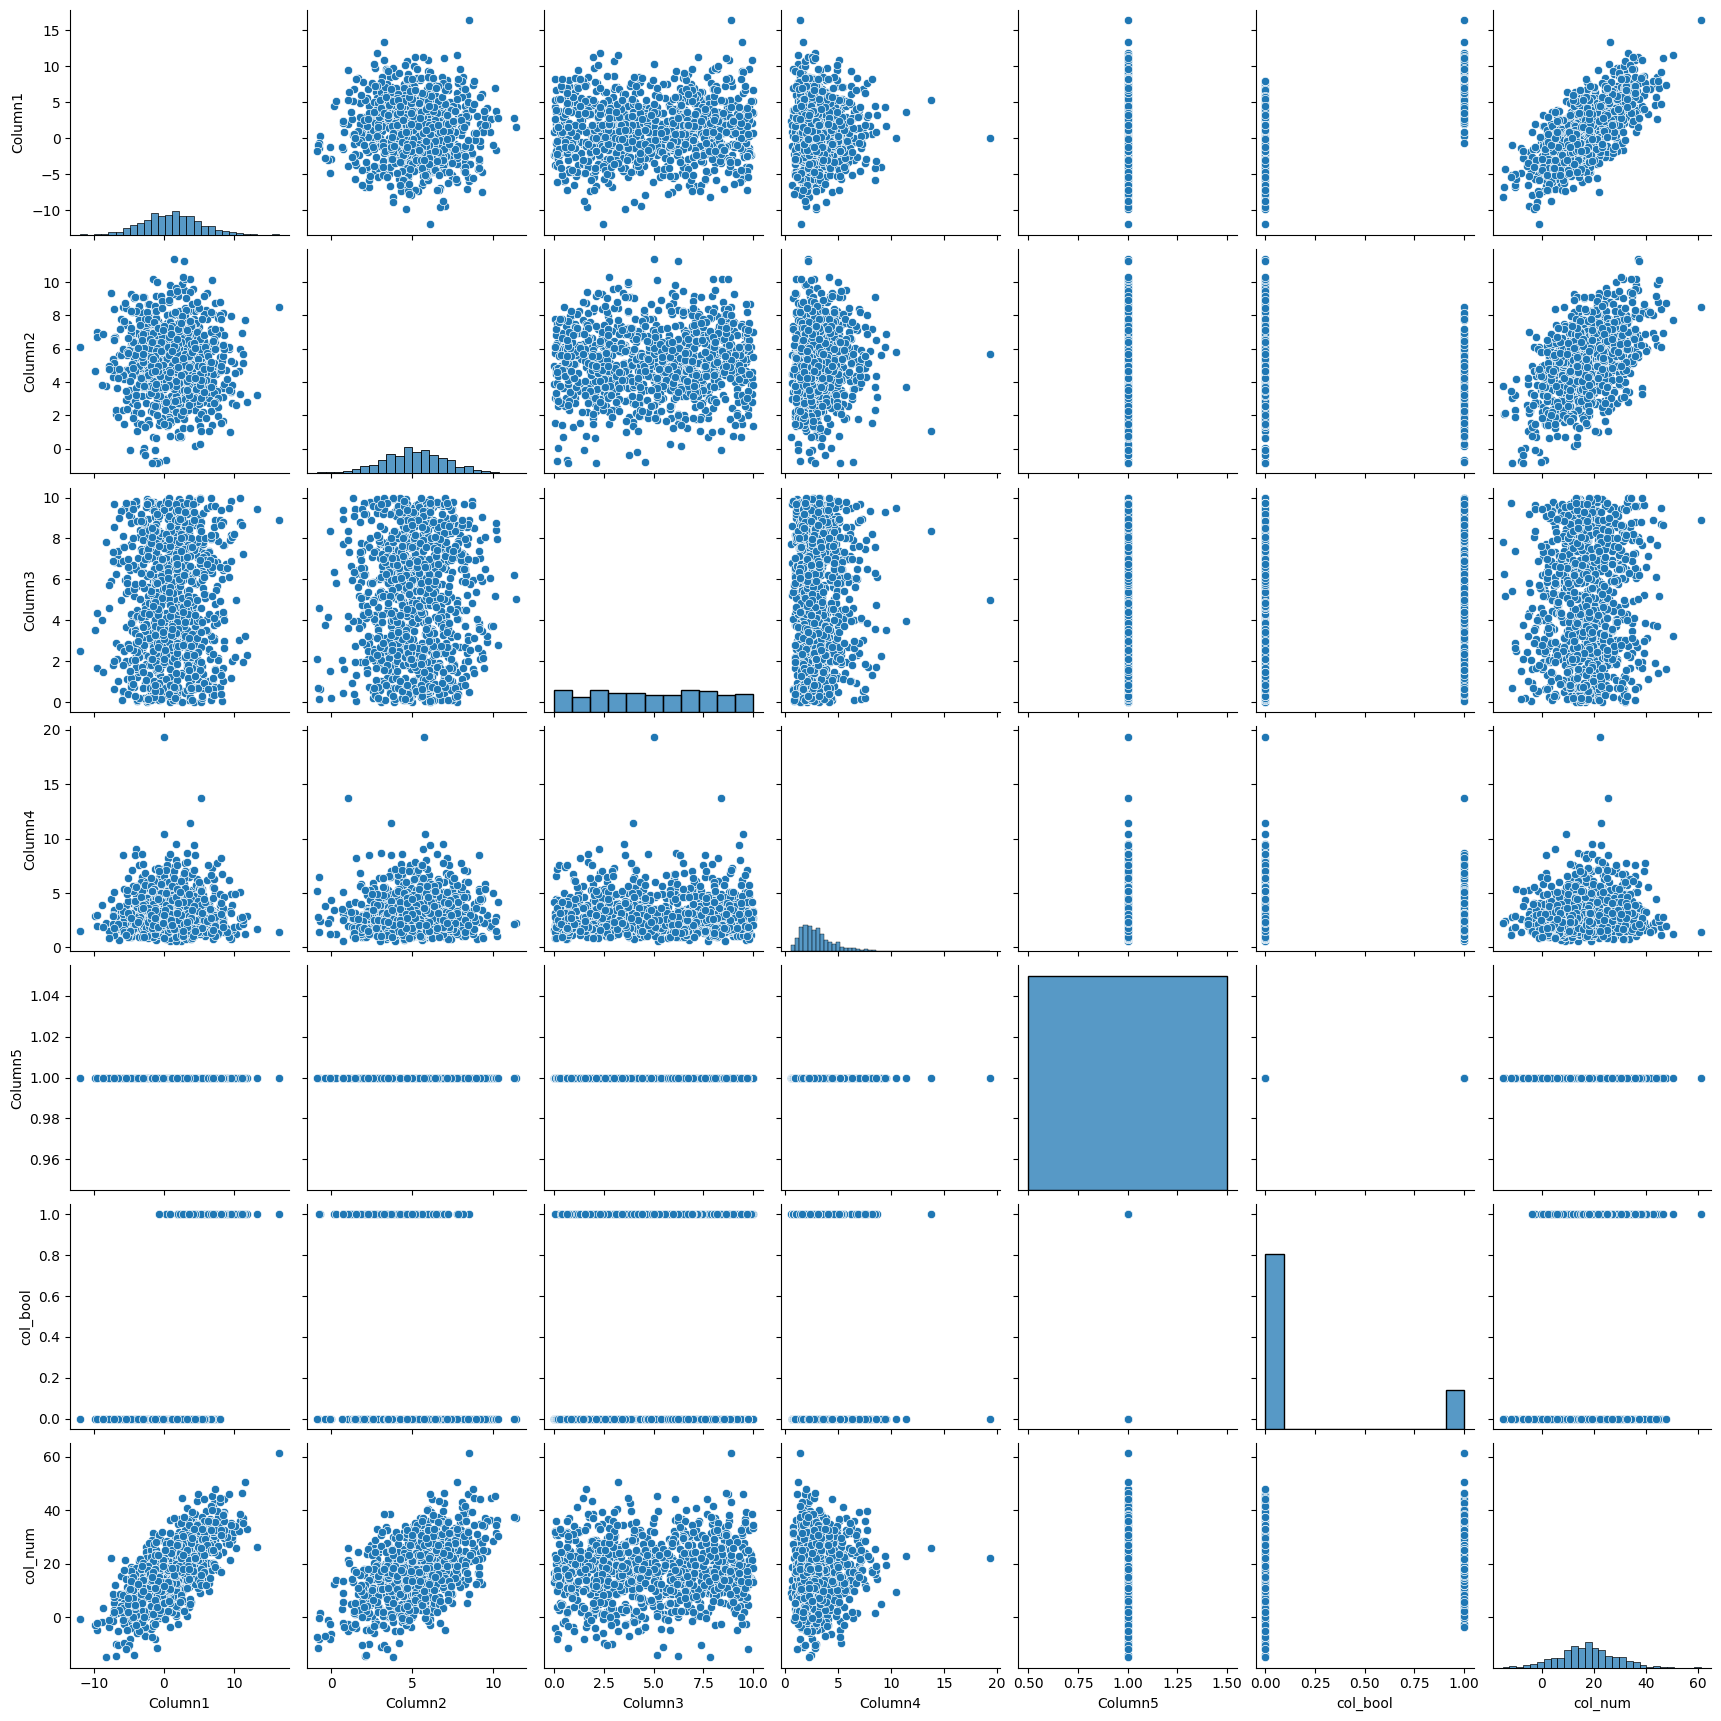

In [22]:
plt.figure(figsize=(4,4))
sns.pairplot(df)

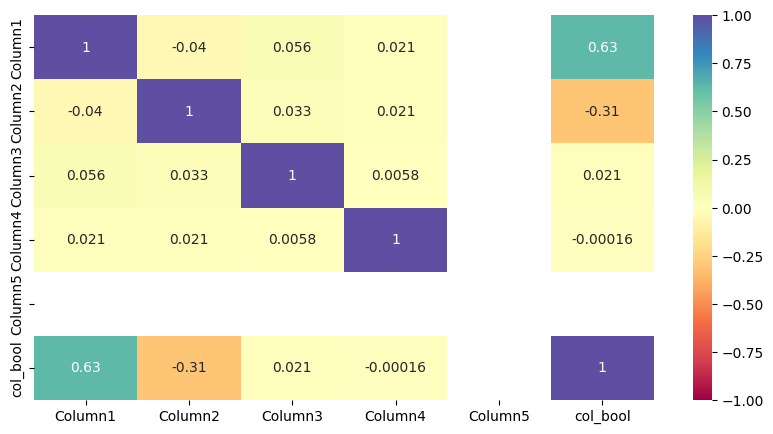

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Column1','Column2','Column3','Column4','Column5','col_bool']].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()
# Category vs Numeric -> Bar chart, Count plot, box plots

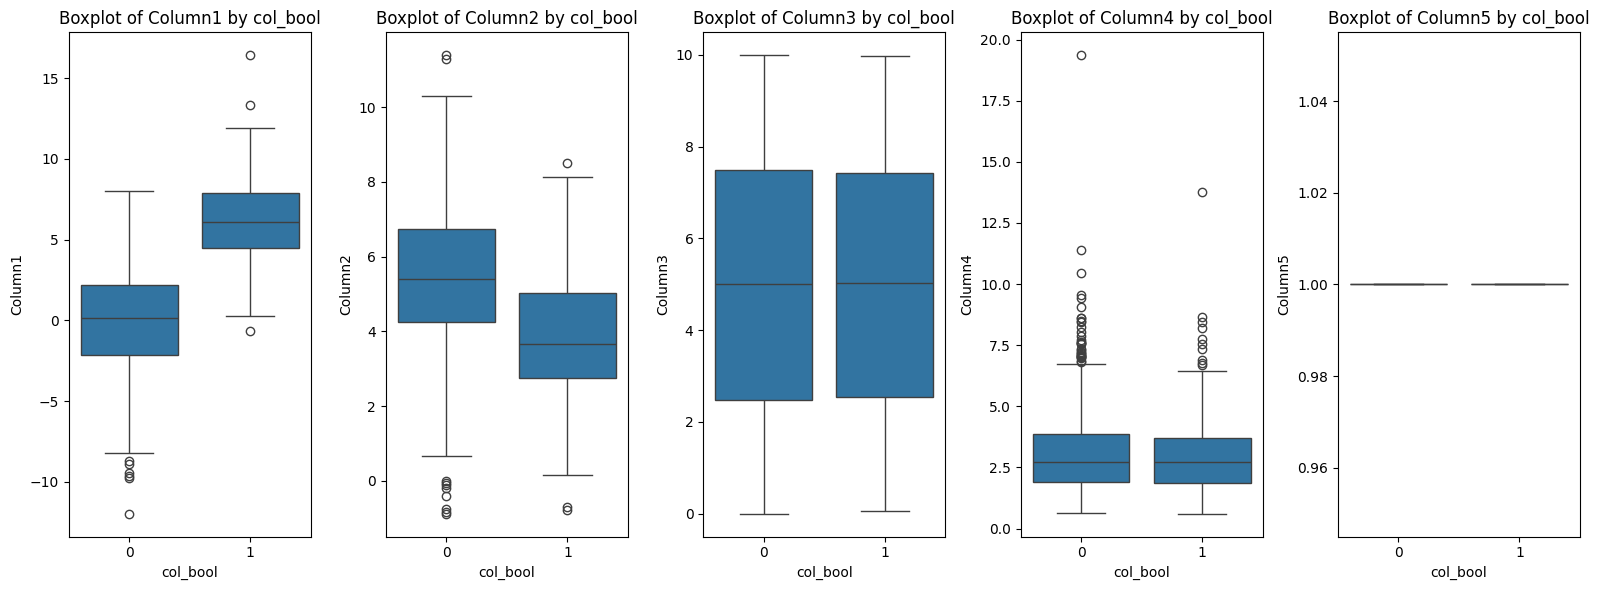

In [9]:
numeric_cols = ['Column1','Column2','Column3','Column4','Column5']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 6))

for i, col in enumerate(numeric_cols):
    sns.boxplot(x='col_bool', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by col_bool')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
#

In [12]:
df.skew().sort_values(ascending=False) #

,0
Column4,2.089479
col_bool,1.642120
Column1,0.116976
col_num,0.065977
Column5,0.000000
Column3,-0.008703
Column2,-0.049396


In [13]:
df.kurt().sort_values(ascending=False) # Outliers

,0
Column4,10.077303
col_bool,0.697950
col_num,0.267841
Column1,0.072562
Column2,0.058403
Column5,0.000000
Column3,-1.216799


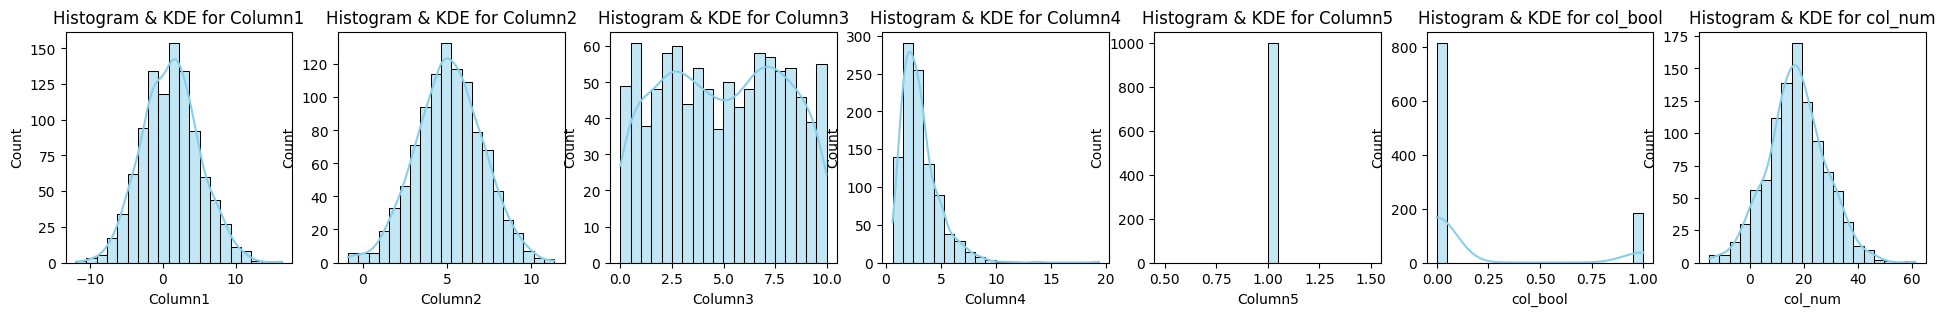

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(24, 3))

for i,col in enumerate(df.columns):
  sns.histplot(df[col], kde=True, ax=axes[i], bins=20, color='skyblue')
  axes[i].set_title(f'Histogram & KDE for {col}')

# Missing Values
### Completely at Random - data entry issue - drop or simple imputation (mean, median and mode)
### Missing at Random - logging data and missing from zip code - group by,knn, regression
### Missing Not at Random - intentionally = biased

# Confidence intervals - Normal distribution assumption

In [ ]:
import numpy as np
import scipy.stats as stats

# Survey data
n = 1000  # Number of respondents
x = 550   # Number of people supporting Candidate A

# Step 1: Calculate Proportion (p-hat)
p_hat = x / n

p_hat


0.55

In [ ]:
# Step 2: Calculate Margin of Error and Confidence Interval
confidence_level = 0.95
z_alpha = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # Z value for 95% confidence - 1.96
print(z_alpha)
# Calculate margin of error
margin_of_error = z_alpha * np.sqrt((p_hat * (1 - p_hat)) / n)
margin_of_error


1.959963984540054


0.009750697708993936

In [ ]:
# Confidence Interval
ci_lower = p_hat - margin_of_error
ci_upper = p_hat + margin_of_error
ci_lower, ci_upper


(0.5191655864637935, 0.5808344135362066)

In [ ]:
import numpy as np
import scipy.stats as stats

# Survey data
n = 10000  # Number of respondents
x = 5500   # Number of people supporting Candidate A

# Step 1: Calculate Proportion (p-hat)
p_hat = x / n

print(p_hat)

# Step 2: Calculate Margin of Error and Confidence Interval
confidence_level = 0.95
z_alpha = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # Z value for 95% confidence

# Calculate margin of error
margin_of_error = z_alpha * np.sqrt((p_hat * (1 - p_hat)) / n)
print(margin_of_error)

# Confidence Interval
ci_lower = p_hat - margin_of_error
ci_upper = p_hat + margin_of_error
ci_lower, ci_upper

0.55
0.009750697708993936


(0.5402493022910061, 0.559750697708994)